# Gaussian Naive Bayes (GaussianNB) - Scikit-Learn

Ao lidar com dados contínuos, uma soposição típica é que os valores contínuos associados a cada classe são distribuídos de acordo com uma distribuição gaussiana (distribuição normal).

### Gaussian Naive Bayes

In [1]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB

# Dataset
iris = load_iris()

# Classificador
clf = GaussianNB()

# Modelo
modelo = clf.fit(iris.data, iris.target)

# Previsões
y_pred = modelo.predict(iris.data)

# Imprime o resultado
print("Total de Observações: %d - Total de Previsões Incorretas: %d"
     % (iris.data.shape[0], (iris.target != y_pred).sum()))

Total de Observações: 150 - Total de Previsões Incorretas: 6


In [2]:
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# Dataset
dataset = load_iris()

# Classificador
clf = GaussianNB()

# Modelo
modelo = clf.fit(dataset.data, dataset.target)
print(modelo)

# Previsões
observado = dataset.target
previsto = modelo.predict(dataset.data)

# Sumário
print(metrics.classification_report(observado, previsto))
print(metrics.confusion_matrix(observado, previsto))

GaussianNB()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [4]:
import numpy as np
from random import random
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pylab as pl
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
%matplotlib inline

In [5]:
# Massa de dados representando 3 classes
leopardo_features = [(random() * 5 + 8, random() * 7 + 12) for x in range(5)]
urso_features = [(random() * 4 + 3, random() * 2 + 30) for x in range(4)]
elefante_features = [(random() * 3 + 20, (random() - 0.5) * 4 + 23) for x in range(6)]

# X
x = urso_features + elefante_features + leopardo_features

# Y
y = ['urso'] * len(urso_features) + ['elefante'] * len(elefante_features) + ['leopardo'] * len(leopardo_features)

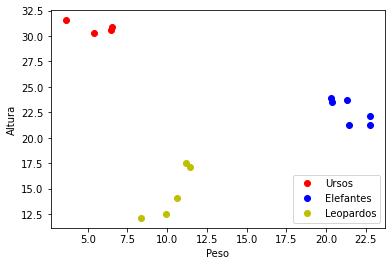

In [6]:
# Plot dos dados
fig, axis = plt.subplots(1, 1)

# Classe 1
urso_weight, urso_height = zip(*urso_features)
axis.plot(urso_weight, urso_height, 'ro', label = 'Ursos')

# Classe 2
elefante_weight, elefante_height = zip(*elefante_features)
axis.plot(elefante_weight, elefante_height, 'bo', label = 'Elefantes')

# Classe 3
leopardo_weight, leopardo_height = zip(*leopardo_features)
axis.plot(leopardo_weight, leopardo_height, 'yo', label = 'Leopardos')

# Eixos
axis.legend(loc = 4)
axis.set_xlabel('Peso')
axis.set_ylabel('Altura')

# Plot
plt.show()

In [7]:
# Criando o Modelo com os dados de treino
clf = GaussianNB()
clf.fit(x, y)

# Criando dados de teste
new_xses = [[2, 3], [3, 31], [21, 23], [12, 16]]

# Previsões
print (clf.predict(new_xses))
print (clf.predict_proba(new_xses))

['leopardo' 'urso' 'elefante' 'leopardo']
[[8.57440692e-132 1.00000000e+000 0.00000000e+000]
 [2.20564785e-086 5.04032808e-021 1.00000000e+000]
 [1.00000000e+000 2.18510061e-024 1.08540266e-099]
 [6.89459757e-027 1.00000000e+000 1.11237016e-227]]


In [8]:
def plot_classification_results(clf, x, y, title):
    # Divide o dataset em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

    # Fit dos dados com o classificador
    clf.fit(x_train, y_train)

    # Cores para o gráfico
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    h = .02  # step size in the mesh
    
    # Plot da fronteira de decisão.
    # Usando o meshgrid do NumPy e atribuindo uma cor para cada ponto 
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Previsões
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Resultados em cada cor do plot
    Z = Z.reshape(xx.shape)
    pl.figure()
    pl.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot dos pontos de dados de treino
    pl.scatter(x_train[:, 0], x_train[:, 1], c = y_train, cmap = cmap_bold)

    y_predicted = clf.predict(x_test)
    score = clf.score(x_test, y_test)
    pl.scatter(x_test[:, 0], x_test[:, 1], c = y_predicted, alpha = 0.5, cmap = cmap_bold)
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    pl.title(title)
    return score

In [9]:
xs = np.array(x)
ys = [0] * len(urso_features) + [1] * len(elefante_features) + [2] * len(leopardo_features)

Classification score was: 1.0


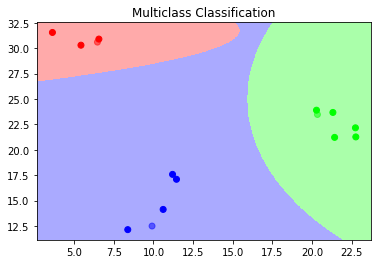

In [10]:
score = plot_classification_results(clf, xs, ys, "Multiclass Classification")
print ("Classification score was: %s" % score)

### Usando o dataset iris

[0 1 2]
(90, 4) (90,)
(60, 4) (60,)


0.8888888888888888

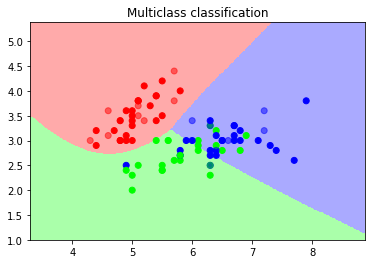

In [11]:
import numpy as np
from sklearn import datasets

# Dataset
iris = datasets.load_iris()

# Imprimindo as 3 classes do dataset
print(np.unique(iris.target))

# Split dos dados
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4)

# Shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Classificador
clf = GaussianNB()

# Resultado
plot_classification_results(clf, x_train[:, :2], y_train, "Multiclass classification")